# Mall Customer Segmentation

### Install Libraries

In [7]:
#pip install numpy


In [8]:
#pip install pandas


In [9]:
#pip install seaborn


In [10]:
#pip install scikit-learn

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [36]:
data=pd.read_csv("Mall_Customers.csv")
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
120,121,Male,27,67,56
57,58,Male,69,44,46
145,146,Male,28,77,97
89,90,Female,50,58,46
105,106,Female,21,62,42
101,102,Female,49,62,48
137,138,Male,32,73,73
3,4,Female,23,16,77
69,70,Female,32,48,47
147,148,Female,32,77,74


### Data Visualization

In [37]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
data.columns.to_list()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

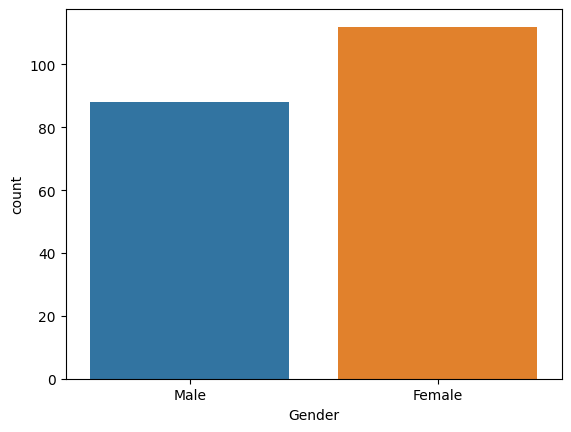

In [40]:
sns.countplot(x=data['Gender'],hue=data['Gender'])

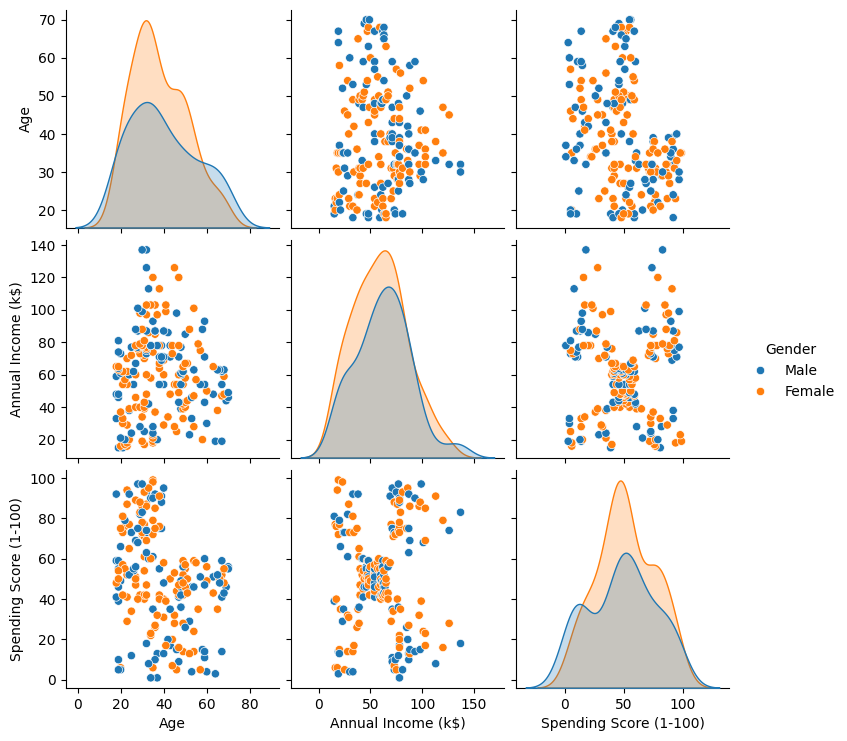

In [41]:
sns.pairplot(data.drop('CustomerID',axis=1), hue="Gender")

### Clustering using K-Means

In [18]:
X_scaled=data.iloc[:,3:5].values
X_scaled

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled

In [21]:
from sklearn.cluster import KMeans

### Selection of Clusters

In [22]:
wscc=[]

for i in range(1,10):
    km_cls=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_scaled)
    w=km_cls.inertia_
    wscc.append(w)

wscc

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25036.417604033988,
 21916.79478984373]

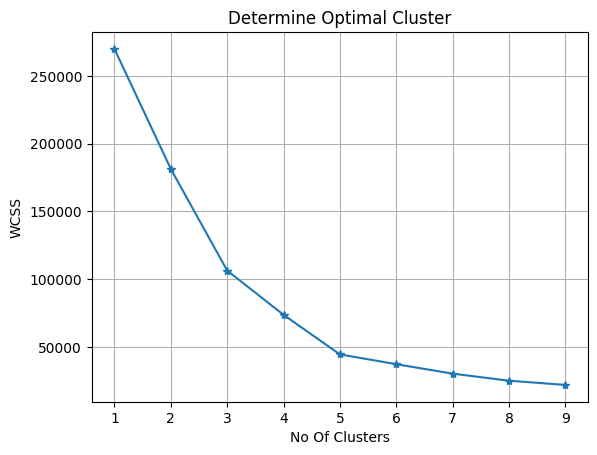

In [23]:
plt.plot(range(1,10),wscc,marker = '*')
plt.xlabel("No Of Clusters")
plt.title("Determine Optimal Cluster")
plt.ylabel("WCSS")
plt.grid()

In [24]:
km_cls=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X_scaled)
p=km_cls.predict(X_scaled)
data['Cluster'] = p


In [25]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


### Plotting the Cluster Boundary and Clusters 

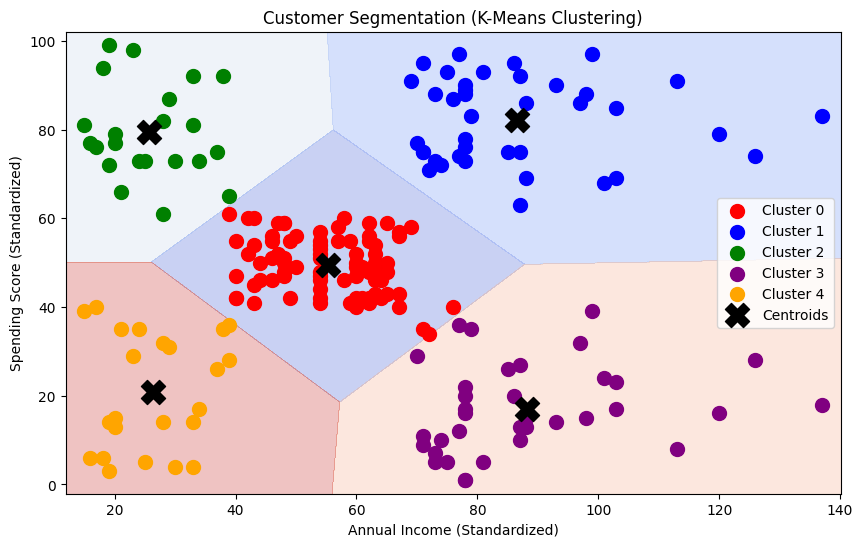

In [26]:

x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min-3, x_max+3, 0.01), np.arange(y_min-3, y_max+3, 0.01))

Z = km_cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5): 
    plt.scatter(X_scaled[data['Cluster'] == i, 0], X_scaled[data['Cluster'] == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(km_cls.cluster_centers_[:, 0], km_cls.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label="Centroids")

plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.legend()
plt.show()

### Visualization of Cluster Result

In [27]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

cluster_summary = cluster_summary.melt(id_vars=['Cluster'], var_name='Feature', value_name='Value')
cluster_summary




,Cluster,Feature,Value
0,0,Age,42.716049
1,1,Age,32.692308
2,2,Age,25.272727
3,3,Age,41.114286
4,4,Age,45.217391
5,0,Annual Income (k$),55.296296
6,1,Annual Income (k$),86.538462
7,2,Annual Income (k$),25.727273
8,3,Annual Income (k$),88.200000
9,4,Annual Income (k$),26.304348


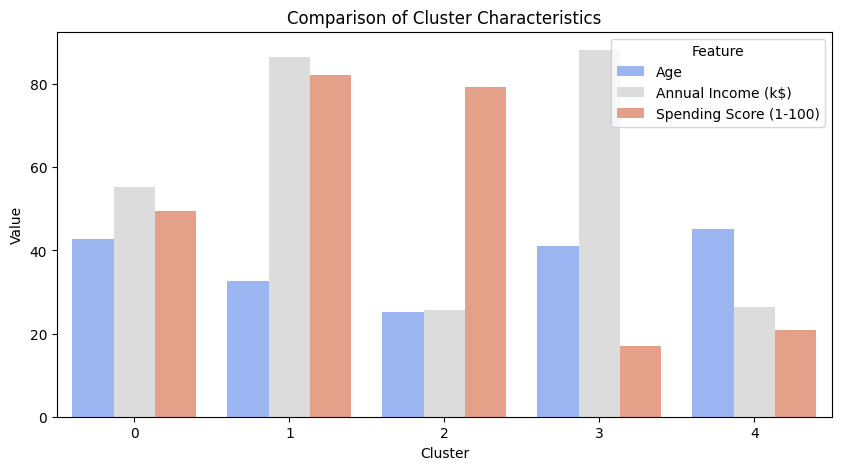

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Cluster', y='Value', hue='Feature', data=cluster_summary, palette="coolwarm")
plt.title("Comparison of Cluster Characteristics")
plt.show()

### **Inference Report on Customer Segmentation (K-Means Clustering)**  

K-Means clustering was applied to segment customers based on annual revenue ($k) and spending score (1-100). The optimal number of clusters was determined using the elbow method, resulting in five distinct clusters. These clusters represent different types of customers based on their income levels and spending behavior.

#### **Cluster 0: Middle Income, Average Spending** 
- **Age:** 43
- **Annual Income:** $55K
- **Spending Score:** 50 
 - **Characteristics:** Customers with **moderate income** and **medium spending scores**.  
 - **Inference:** They have **potential for increased spending** if provided with the right incentives.  
 - **Strategy:** Implement **seasonal promotions, installment payment options, and targeted advertisements** to increase their spending.  

---

#### **Cluster 1: High Income, High Spending (Premium Customers)**  
- **Age:** 33
- **Annual Income:** $87K
- **Spending Score:** 82 
- **Characteristics:** These customers have **high annual income** and **high spending scores**.  
- **Inference:** They are **ideal target customers** who are both **financially capable** and **willing to spend**.  
- **Strategy:** Focus on **premium offerings, exclusive discounts, and VIP memberships** to retain them. Personalized marketing can boost their engagement further.  

---

#### **Cluster 2: Low Income, High Spending (Impulse Buyers)**  
- **Age:** 25
- **Annual Income:** $26K
- **Spending Score:** 79 
- **Characteristics:** Customers with **low annual income** but **high spending scores**.  
- **Inference:** These individuals tend to spend **beyond their financial capacity**, possibly on discounts or impulse purchases.  
- **Strategy:** Offer **loyalty rewards, installment plans, and budget-friendly options** to maintain engagement while ensuring sustainable spending habits.  

---

#### **Cluster 3: High Income, Low Spending (Conservative Spenders)**  
- **Age:** 41
- **Annual Income:** $88K
- **Spending Score:** 17 
- **Characteristics:** Customers with **high income** but **low spending scores**.  
- **Inference:** Despite having financial capacity, they prefer to **spend cautiously** or focus on specific products.  
- **Strategy:** Encourage spending by offering **exclusive deals, premium product recommendations, and personalized promotions** based on their past purchases.  

---

#### **Cluster 4: Low Income, Low Spending** 
- **Age:** 45
- **Annual Income:** $26K
- **Spending Score:** 21 
- **Characteristics:** Customers in this cluster have **low annual income** and **low spending scores**.  
- **Inference:** These customers are either budget-conscious or do not engage in frequent purchases. They are **not a priority target** for marketing efforts.  
- **Strategy:** Consider offering budget-friendly promotions or basic loyalty programs to increase engagement.  

---

### **Conclusion:**  
1. **Premium customers (Cluster 1) are the best targets** for high-value marketing campaigns and loyalty programs.  
2. **Impulse buyers (Cluster 2) can be encouraged** to engage more through loyalty programs and controlled spending incentives.  
3. **Conservative high-income customers (Cluster 3) need strategic promotions** to increase their spending habits.  
4. **Middle-income customers (Cluster 0) have moderate potential** for increased spending with proper marketing.  
5. **Low-income, low-spending customers (Cluster 4) require basic, budget-friendly engagement strategies** but are not high-priority targets.  

---
